In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

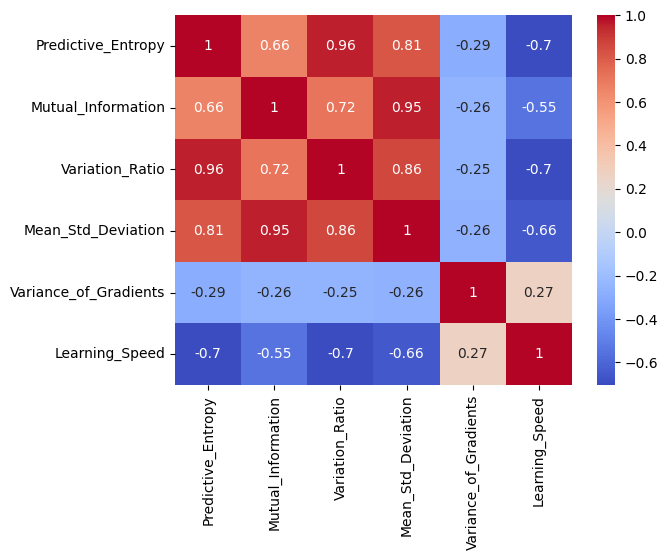

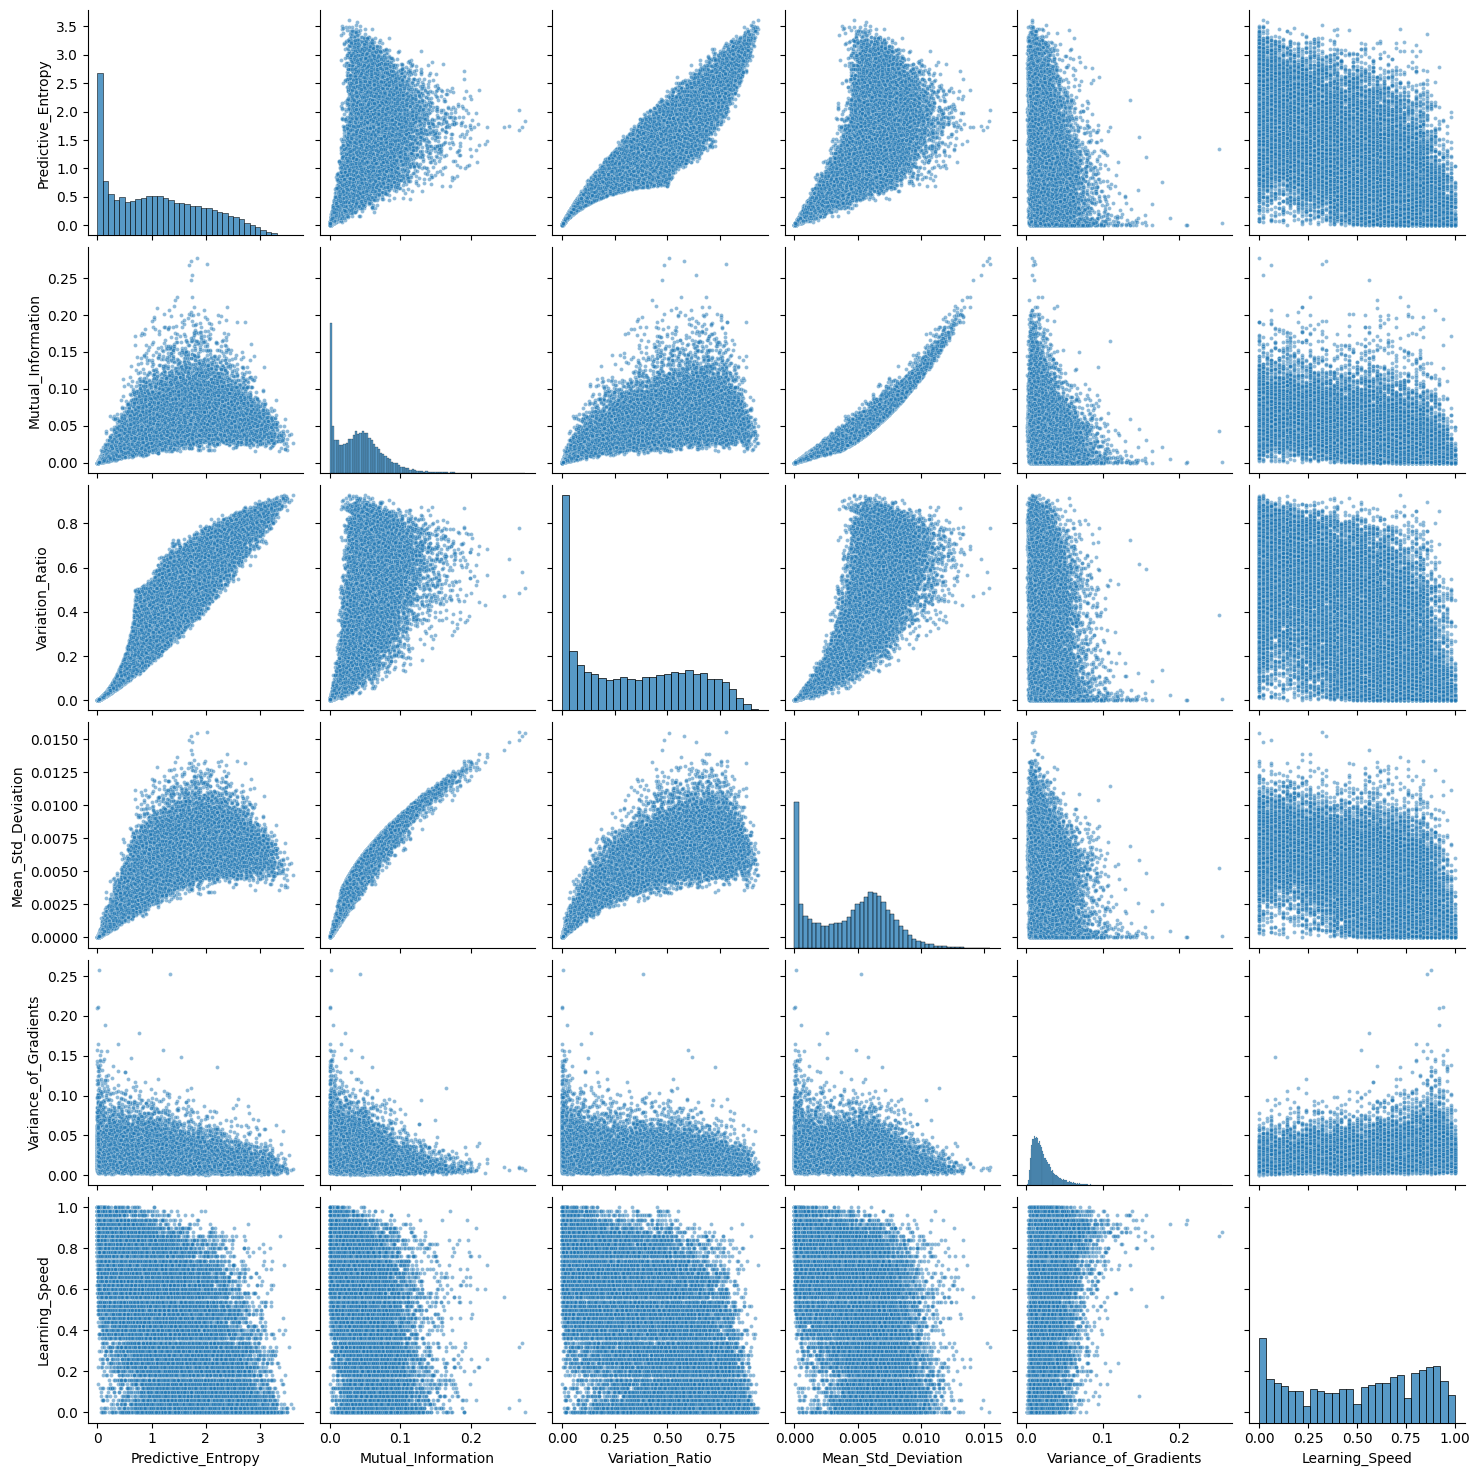

In [3]:
seed = 42
filename = f"../checkpoints/metrics_seed_{seed}.pkl"
df = pd.read_pickle(filename)
df = df.drop(columns=["Predicted_Class_MC"])
#df = df[2500:3000]

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
sns.pairplot(df, plot_kws={"s": 8, "alpha":0.5});

In [4]:
len(df[df["Learning_Speed"] == 0])/25000

0.05044

In [6]:
final_acc_train = np.load(f"../checkpoints/final_acc_seed_{seed}_train.npy")
final_acc_test = np.load(f"../checkpoints/final_acc_seed_{seed}_test.npy")
final_acc_test.mean()

np.float32(0.4138)

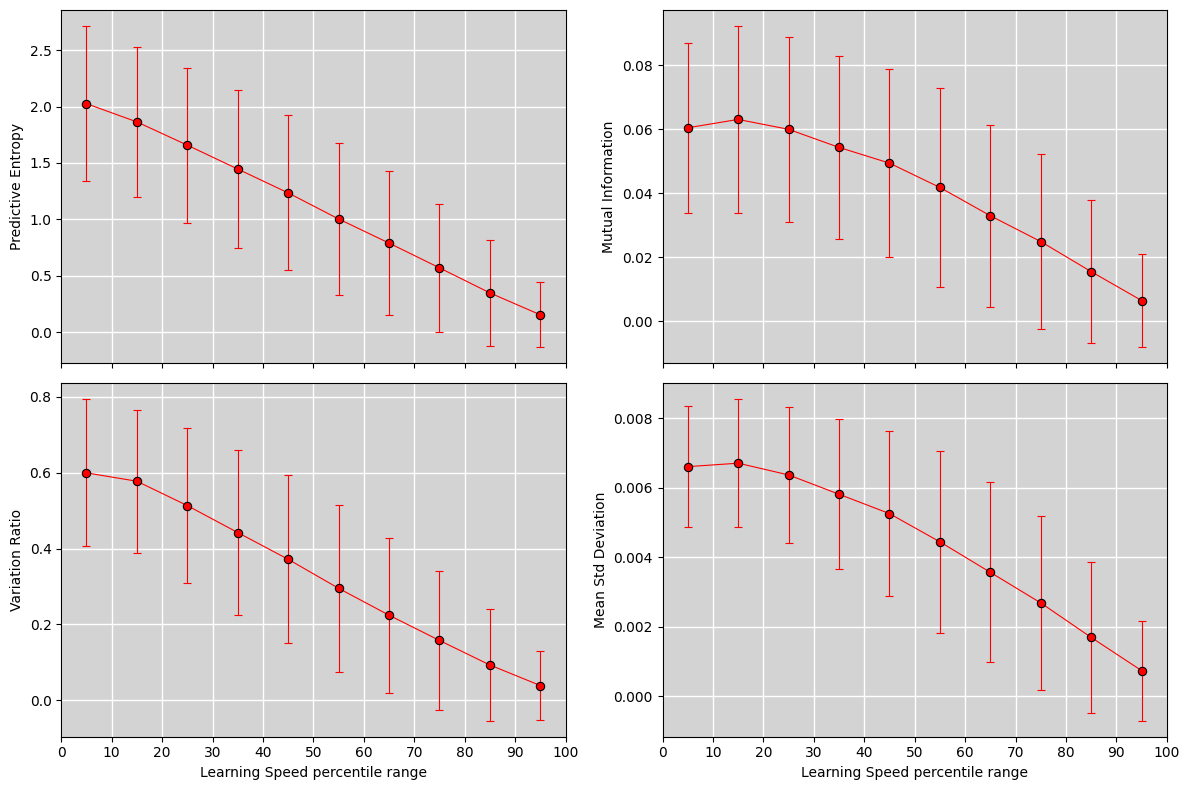

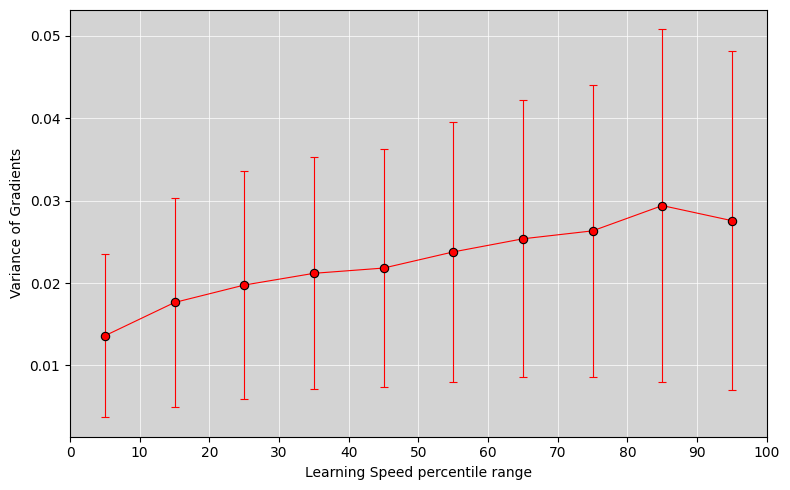

In [7]:
# Define bins for grouping Learning Speed
#learning_speed_bins = np.linspace(-0.025, 1.025, 22)
#df['Learning_Speed_Binned'] = pd.cut(df['Learning_Speed'], bins=learning_speed_bins)

percentiles = np.linspace(0, 100, 11)  # Define bins: 0-10%, 10-20%, ..., 90-100%
df['Percentile_Range'] = pd.qcut(df['Learning_Speed'], q=percentiles/100, labels=percentiles[:-1] + 5)

# Group by Learning Speed bins and calculate mean and standard deviation for each bin
grouped = df.groupby('Percentile_Range', observed=False).agg(
    Average_Learning_Speed=('Learning_Speed', 'mean'),
    Std_Learning_Speed=('Learning_Speed', 'std'),
    Predictive_Entropy_Mean=('Predictive_Entropy', 'mean'),
    Predictive_Entropy_Std=('Predictive_Entropy', 'std'),
    Mutual_Information_Mean=('Mutual_Information', 'mean'),
    Mutual_Information_Std=('Mutual_Information', 'std'),
    Variation_Ratio_Mean=('Variation_Ratio', 'mean'),
    Variation_Ratio_Std=('Variation_Ratio', 'std'),
    Mean_Std_Deviation_Mean=('Mean_Std_Deviation', 'mean'),
    Mean_Std_Deviation_Std=('Mean_Std_Deviation', 'std'),
    Variance_of_Gradients_Mean =('Variance_of_Gradients', 'mean'),
    Variance_of_Gradients_Std=('Variance_of_Gradients', 'std'),
).reset_index()

# Plot with error bars
variables_to_plot = [
    ('Predictive_Entropy_Mean', 'Predictive_Entropy_Std'),
    ('Mutual_Information_Mean', 'Mutual_Information_Std'),
    ('Variation_Ratio_Mean', 'Variation_Ratio_Std'),
    ('Mean_Std_Deviation_Mean', 'Mean_Std_Deviation_Std')
]

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
for i, (y_mean, y_std) in enumerate(variables_to_plot):
    row, col = i // 2, i % 2
    ax = axs[row, col]
    ax.errorbar(
        grouped['Percentile_Range'],
        grouped[y_mean],
        yerr=grouped[y_std],
        fmt='o',
        color='red',
        markeredgecolor='black',
        markeredgewidth=0.8,
        linestyle='-',
        linewidth=0.8,
        capsize=3,
        elinewidth=0.8,
        capthick=0.8,
    )
    ax.set_facecolor('lightgray')
    ax.grid(True, linestyle='-', linewidth=1, color='white')

    if row == 1:
        ax.set_xlabel('Learning Speed percentile range')
    ax.set_ylabel(y_mean.replace('_Mean', '').replace('_', ' '))
    ax.set_xticks(np.arange(0, 101, 10))

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.errorbar(
        grouped['Percentile_Range'],
        grouped['Variance_of_Gradients_Mean'],
        yerr=grouped['Variance_of_Gradients_Std'],
        fmt='o',
        color='red',
        markeredgecolor='black',
        markeredgewidth=0.8,
        linestyle='-',
        linewidth=0.8,
        capsize=3,
        elinewidth=0.8,
        capthick=0.8,
    )
plt.xlabel('Learning Speed percentile range')
plt.ylabel("Variance of Gradients")
plt.xticks(np.arange(0, 101, 10))
plt.grid(True, which='major', linestyle='-', linewidth=0.5, color='white')
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show();

In [8]:
df

,Predictive_Entropy,Mutual_Information,Variation_Ratio,Mean_Std_Deviation,Variance_of_Gradients,Learning_Speed,Percentile_Range
Index,,,,,,,
0,0.022845,0.000875,0.002701,0.000080,0.025252,0.58,55.0
1,0.000392,0.000019,0.000035,0.000002,0.028919,0.92,95.0
2,0.027644,0.001296,0.003216,0.000115,0.020016,0.82,75.0
3,2.878772,0.049031,0.873422,0.006386,0.002907,0.02,5.0
4,0.011168,0.000484,0.001287,0.000048,0.013800,0.92,95.0
...,...,...,...,...,...,...,...
24995,0.540545,0.038104,0.143773,0.003757,0.038498,0.76,75.0
24996,0.032874,0.000540,0.004376,0.000079,0.017259,0.82,75.0
24997,1.590877,0.087631,0.608590,0.008407,0.043353,0.08,15.0
